In [1]:
from insight_analyzer import *

analyzer = ClusterAnalyzer("019ca9a88c3b751d9e84938f6a5420844b9d7573", workspace="2b2f7df9d0214f3583d0bbd49678273a")
df = analyzer.get_df()

Let's preview the data:

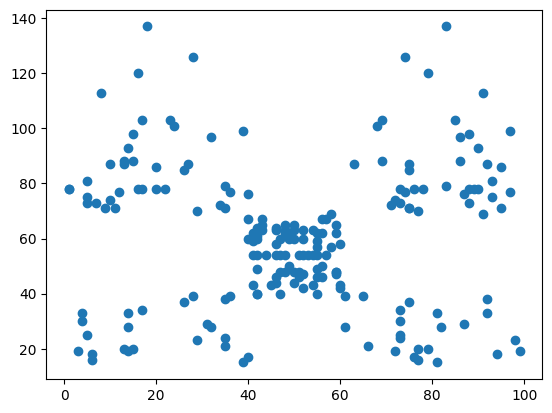

In [2]:
plt.scatter(
    df[df.columns[0]],
    df[df.columns[1]]
)
plt.show()

Ok, looks good. Let's set up our predictor!

In [3]:
# Threshold for cluster proximity, lower promotes splitting
threshold = 0.03

cluster_count = 5

# We need to update our DF to be compatible with Birch
x = np.column_stack((df[df.columns[0]], df[df.columns[1]]))

model = Birch(threshold=threshold, n_clusters=cluster_count)
yhat = model.fit_predict(x)


Now let's preview the clusters!

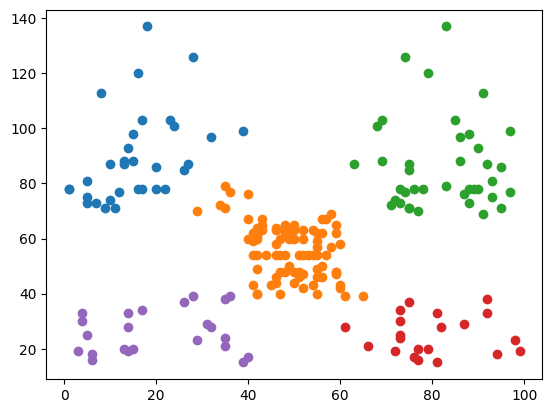

In [4]:
for cluster in np.unique(yhat):
    plt.scatter(df.values[yhat == cluster, 0], df.values[yhat == cluster, 1])
plt.show()

Altough this looks promising, we will get better results, if we normalize the coordinates. To do so, let's use the `MinMaxScaler`.

In [5]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the data
scaler = MinMaxScaler(feature_range=(0,1))
normalized_df = scaler.fit_transform(df)
normalized_df = pd.DataFrame(normalized_df, columns=df.columns)


Ok, we can run our predictor again, with the same setting as before, so we do not change too much at a time.

In [6]:
from sklearn.cluster import Birch

# Threshold for cluster proximity, lower promotes splitting
threshold = 0.03

cluster_count = 5

# We need to update our DF to be compatible with Birch
x = np.column_stack(
    (normalized_df[normalized_df.columns[0]],
     normalized_df[normalized_df.columns[1]])
)

model = Birch(threshold=threshold, n_clusters=cluster_count)
yhat = model.fit_predict(x)

One last preview, before pushing the data to server.

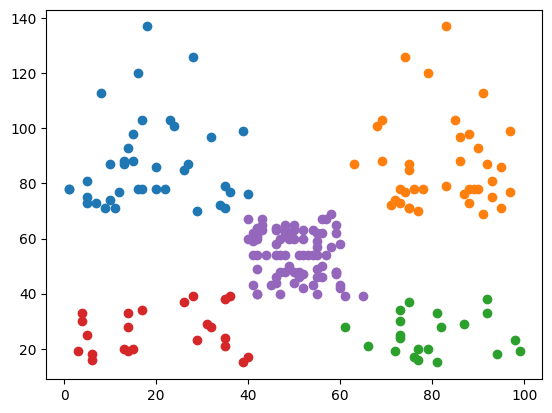

In [7]:
for cluster in np.unique(yhat):
    plt.scatter(df.values[yhat == cluster, 0], df.values[yhat == cluster, 1])
plt.show()

Awesome! Last thing to do now is to push it to the server, so we can see it on our dashboard.

In [8]:
analyzer.push_to_server(yhat)

{"clusters": [[[29.0, 70.0], [35.0, 71.0], [11.0, 71.0], [9.0, 71.0], [34.0, 72.0], [5.0, 73.0], [7.0, 73.0], [10.0, 74.0], [5.0, 75.0], [40.0, 76.0], [12.0, 77.0], [36.0, 77.0], [22.0, 78.0], [17.0, 78.0], [20.0, 78.0], [16.0, 78.0], [1.0, 78.0], [1.0, 78.0], [35.0, 79.0], [5.0, 81.0], [26.0, 85.0], [20.0, 86.0], [27.0, 87.0], [13.0, 87.0], [10.0, 87.0], [13.0, 88.0], [15.0, 88.0], [14.0, 93.0], [32.0, 97.0], [15.0, 98.0], [39.0, 99.0], [24.0, 101.0], [17.0, 103.0], [23.0, 103.0], [8.0, 113.0], [16.0, 120.0], [28.0, 126.0], [18.0, 137.0]], [[91.0, 69.0], [77.0, 70.0], [95.0, 71.0], [75.0, 71.0], [75.0, 71.0], [71.0, 72.0], [88.0, 73.0], [73.0, 73.0], [72.0, 74.0], [93.0, 75.0], [87.0, 76.0], [97.0, 77.0], [74.0, 77.0], [90.0, 78.0], [88.0, 78.0], [76.0, 78.0], [89.0, 78.0], [78.0, 78.0], [73.0, 78.0], [83.0, 79.0], [93.0, 81.0], [75.0, 85.0], [95.0, 86.0], [63.0, 87.0], [75.0, 87.0], [92.0, 87.0], [86.0, 88.0], [69.0, 88.0], [90.0, 93.0], [86.0, 97.0], [88.0, 98.0], [97.0, 99.0], [68.